    Author: Eswar Lakshminarayanan

### Level 1

    In this notebook, we have performed k means clustering for level 1 data. Here Level 1 data means, people who have spent time only level 1 of the Art Galley 

#### Reading Entire Level 1 Data

In [8]:
import pandas as pd 
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import folium
import folium.plugins as plugins
from folium.plugins import HeatMap
df = pd.read_csv("../pre_processing11/level1_coordinates_only.csv",header=0)
df.head(3)

,lat,lng
0,1.291096,103.851830
1,1.290796,103.851776
2,1.291009,103.851845


In [9]:
df.shape

(124373642, 2)

### Intuitive method to come up with a range for (k) clusters

    - here we are plotting a heatmap for the level data using the below code. 
    - Since the size of the html file generated my heatmap is huge, it is not rendered on jupyter notebook but only on firefox browser
    - Here is the code that is used to generate the heatmap
    
```m = folium.Map(lat_lon[0][0:2], tiles='OpenStreetMap', zoom_start=20)
HeatMap(lat_lon,radius=7,max_zoom=28).add_to(m)
m.save('/home/opc/level1.html')```

    - Below is the picture of heatmap prdouced for level 1. 
    - The picture below clearly shows that there are around 8 to 10 spots wwhere the density is quite high
    


<img src="http://drive.google.com/uc?export=view&id=1zjJo73cRSb-0Zq5vmvf2JvVYnXvTq7rd">

### Training kmeans model with different k values for clusters

In [10]:
centers_ = []
Sum_of_squared_distances = []
range_n_clusters = [6,7,8,10]
for n_clusters in range_n_clusters:
    print("number of clusters:", n_clusters)
    clusterer = KMeans (n_clusters=n_clusters, init='k-means++', n_init=5, max_iter=300, tol=0.0001, verbose=1,precompute_distances='auto', random_state=3192, copy_x=True, n_jobs=1, algorithm='auto')
    clusterer.fit(df)
    centers = clusterer.cluster_centers_.tolist()
    centers_.append(centers)
    Sum_of_squared_distances.append(clusterer.inertia_)

number of clusters: 6
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1.879221660540207
start iteration
done sorting
end inner loop
Iteration 1, inertia 1.7734319714284341
start iteration
done sorting
end inner loop
Iteration 2, inertia 1.7591690403006504
start iteration
done sorting
end inner loop
Iteration 3, inertia 1.7550446733709848
start iteration
done sorting
end inner loop
Iteration 4, inertia 1.7530905977607185
start iteration
done sorting
end inner loop
Iteration 5, inertia 1.751192668669294
start iteration
done sorting
end inner loop
Iteration 6, inertia 1.750250666813486
start iteration
done sorting
end inner loop
Iteration 7, inertia 1.7498664357081377
start iteration
done sorting
end inner loop
Iteration 8, inertia 1.7497094504761324
start iteration
done sorting
end inner loop
Iteration 9, inertia 1.749637243163207
center shift 2.484290e-06 within tolerance 1.190190e-11
Initialization complete
start iteration
done sorting
end inner

Iteration 8, inertia 1.4128007533180345
start iteration
done sorting
end inner loop
Iteration 9, inertia 1.3975437715116925
start iteration
done sorting
end inner loop
Iteration 10, inertia 1.3861149998691507
start iteration
done sorting
end inner loop
Iteration 11, inertia 1.3780177479274762
start iteration
done sorting
end inner loop
Iteration 12, inertia 1.3739326907672686
start iteration
done sorting
end inner loop
Iteration 13, inertia 1.3720784746844925
start iteration
done sorting
end inner loop
Iteration 14, inertia 1.3706616858681777
start iteration
done sorting
end inner loop
Iteration 15, inertia 1.3696070609914466
start iteration
done sorting
end inner loop
Iteration 16, inertia 1.368550454992211
start iteration
done sorting
end inner loop
Iteration 17, inertia 1.367727060560768
start iteration
done sorting
end inner loop
Iteration 18, inertia 1.367111338590612
start iteration
done sorting
end inner loop
Iteration 19, inertia 1.3665701233642948
start iteration
done sorting


Iteration 17, inertia 1.091121852701133
start iteration
done sorting
end inner loop
Iteration 18, inertia 1.0902515018367398
start iteration
done sorting
end inner loop
Iteration 19, inertia 1.0898976760355192
start iteration
done sorting
end inner loop
Iteration 20, inertia 1.0897305436208478
start iteration
done sorting
end inner loop
Iteration 21, inertia 1.089642639510894
center shift 3.382495e-06 within tolerance 1.190190e-11
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1.4414194191319132
start iteration
done sorting
end inner loop
Iteration 1, inertia 1.4024405566695468
start iteration
done sorting
end inner loop
Iteration 2, inertia 1.3925111107439307
start iteration
done sorting
end inner loop
Iteration 3, inertia 1.3858325085122993
start iteration
done sorting
end inner loop
Iteration 4, inertia 1.3772913857001745
start iteration
done sorting
end inner loop
Iteration 5, inertia 1.3530243014908583
start iteration
done sorting
end inne

Iteration 11, inertia 0.8744915543651863
start iteration
done sorting
end inner loop
Iteration 12, inertia 0.8731779273217241
start iteration
done sorting
end inner loop
Iteration 13, inertia 0.8721827381629691
start iteration
done sorting
end inner loop
Iteration 14, inertia 0.8700836410457065
start iteration
done sorting
end inner loop
Iteration 15, inertia 0.8685388082452358
start iteration
done sorting
end inner loop
Iteration 16, inertia 0.8683600935659066
start iteration
done sorting
end inner loop
Iteration 17, inertia 0.8683315645225858
center shift 2.410636e-06 within tolerance 1.190190e-11
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 1.010873632544273
start iteration
done sorting
end inner loop
Iteration 1, inertia 0.9472813403012533
start iteration
done sorting
end inner loop
Iteration 2, inertia 0.9156799365160633
start iteration
done sorting
end inner loop
Iteration 3, inertia 0.8729818788641999
start iteration
done sorting
end i

### Plotting Inertia vs Number of Cluster(k)

    Inertia: Sum of squared distances of samples to their closest cluster center. Here, lower inertia means, the closer/tighter the cluster is. Based on the graph below, we will select the clusters with lowest inertia.

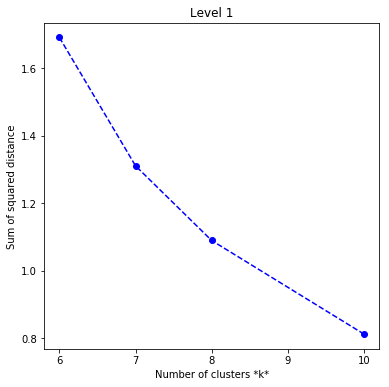

In [15]:
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline
plt.figure(figsize=(6, 6))
plt.plot(range_n_clusters, Sum_of_squared_distances,linestyle='--', marker='o', color='b')
plt.xticks(np.arange(min(range_n_clusters), max(range_n_clusters)+1, 1.0))
plt.title("Level 1")
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance')
plt.savefig("level_l1_elbow")
plt.show()

#### Here are the cluster centroids for the K clusters with minimum inertia
    
    In our case k = 10 has the minimum inertia, as you could see on the graph above

In [16]:
centroids = centers_[-1]
centroids

[[1.2903103009291614, 103.85171462263504],
 [1.2908902726767266, 103.85202533800346],
 [1.289789749739707, 103.85094551592016],
 [1.2906933814308985, 103.85169813719598],
 [1.290721622083614, 103.8519784236061],
 [1.2905195598047814, 103.85190685686388],
 [1.2902609298508232, 103.85156336022752],
 [1.2910556834953402, 103.85198312828452],
 [1.2901006298427633, 103.85138272669332],
 [1.2904639288344215, 103.85154436869509]]

#### Now let's plot the centroids and see how close they are to high density areas in out heatmap 

In [18]:

m = folium.Map(centroids[0], tiles='OpenStreetMap', zoom_start=25)

for i in range(0,len(centroids)):
    folium.Circle(location=[centroids[i][0], centroids[i][1]],radius=5,color='crimson',fill=True,fill_color='crimson').add_to(m)
m

### For comparsion purpose, plotting heatmap and clusters centroids side by side
    
    - As you can see most cluster centroids, overlap the high density areas on heatmap

  <tr>
    <td> <img src="http://drive.google.com/uc?export=view&id=1zjJo73cRSb-0Zq5vmvf2JvVYnXvTq7rd" alt="Drawing" style="width: 500px;"/> </td>
    <td> <img src="http://drive.google.com/uc?export=view&id=1KzliDxfDoQBBxikNSekVGPTOglxejwuL" alt="Drawing" style="width: 500px;"/> </td>
    </tr>